
   

# Python Tutorial 4
# Review of the last and today's session

During our last session we learned a bunch of different programming topics:

II.  [Introduction to Python IDE _Spyder_](#spyder)<br>
III. [Lambda functions](#lambda)<br>

Furthermore, we are going to talk about useful concepts and python philosophies to become a good python pogrammer:

IV. [How to become a 'clean programmer'](#clean)<br>
1. [Style guide: some notes about PEP8](#style-guide)<br>
2. [Decompose your code into mutiple functions](#decomposition)<br>
3. [Nested for-loops](#nested)<br>
4. [Remarks on using return and print()](#return)<br>
5. [Chosing the right data type for your purpose](#data-type)<br>
6. [List comprehensions](#list-compr)<br>
7. [Commenting your code](#comment)<br>
8. ["Errors should never pass silently. Unless explicitly silenced."](#zen_silence)<br> 
   a. [Einfügen von exceptions bzw. `try/except`-blocks](#exceptions)<br>
   b. [Code debugging](#debugging)<br> 
   c. [Unittesting](#unittest)<br>
   

In this lesson we will dig deeper into using python as a valuable tool for traing, testing and validating neural networks. 

1. [Python frameworks for building neural networks](#frameworks)<br>
2. [Review of Theoretical concepts about neural networks](#theory)<br>
2.1 [Perceptron as a logical operation](#logical_operation)<br>
2.1.1 [AND Perceptron](#and)<br>
2.1.2 [OR Perceptron](#or)<br>
2.1.3 [NOT Perceptron](#not)<br>
2.1.4 [Excercise: XOR Perceptron](#xor)<br>
2.2. [Activation Functions](#activation_function)<br>
2.3 [Optimization](#optim)<br>
2.4 [Training and Testing](#TNT)<br>
3. [Training Neural Networks with Pytorch](#Pytorch)<br>
3.1 [Installation of Pytorch Package](#installation)<br>
3.2 [Single Layer Neural Network](#single_layer)<br>
3.2 [Multilayer Neural Network](#multi_layers)<br>
4. [Classification on MNIST Dataset](#mnist)<br>
4.1 [Building the Neural Network](#building)<br>
4.2 [Training the Neural Network](#training)<br>
4.3 [Testing and Validation](#test_val)<br>
4.4 [Overfitting](#overfitting)<br>
4.5 [Exercise: Data Augmentation](#data_augmentation)<br>
4.6 [Saving and Loading the Neural Network](#save_n_load)<br>



One concept we learned last time and will be used more often during this session are list comprehensions.
So get used to it!



# 1. Python frameworks for building neural networks <a class="anchor" id="frameworks"></a>
In our first lecture we introduced different packages such as __numpy__, __pandas__ and __matplotlib__. When building and training neural networks, we usually take advantage of packages such as __tensorflow__ or __pytorch__ which already have the basic building blocks implemented. Here is a short reminder of the different packages used:

__Tensorflow__ [[1]](https://www.tensorflow.org/): Tensorflow is a machine learning library developed by Google. In contrast to scikit-learn [[2]](https://scikit-image.org/) (library containing basic ML algorithms, data mining and preprocessing in image processing) where, Tensorflow is specially designed for the use in the area of deep learning and supports symbolic calculations and execution on graphics cards (GPUs) to accelerate computing.
<br>
__Keras__ [[3]](https://keras.io/): Keras provides an easy-to-use and easy-to-learn API (application programming interface) for creating and training neural networks. It relies on Tensorflow or Theano as backend.
<br>
__Pytorch__[[4]](https://pytorch.org/)[[5]](https://pytorch.org/tutorials/beginner/examples_autograd/tf_two_layer_net.html)[[6]](https://towardsdatascience.com/pytorch-for-deep-learning-a-quick-guide-for-starters-5b60d2dbb564): In industry, tensorflow is still the package of choice. However, in the last years, it has often been criticized for being difficult to debug, since it uses static computational graphs. Pytorch is a framework which was developed by Facebook and is based on the library _torch_. One of its advantages is that it uses dynamic computational graphs which allows for dynamic network changes as it being run, with little or no overhead.
<br>
__Theano__ [[7]](http://deeplearning.net/software/theano/)[[8]](https://machinelearningmastery.com/introduction-python-deep-learning-library-theano/): Theano is a compiler that executed mathematical expressions and is also heavily used for training neural networks. Since Theano belongs to the older packages it is not recommended.
<br>
__Caffe__ [[9]](https://caffe.berkeleyvision.org/): Models can be defined in a plain text file and are processed on command line. 
<br>

At the moment __tensorflow__ is still the most widely used deep learning framework used within python especially in industrial applications [[10]](https://towardsdatascience.com/deep-learning-framework-power-scores-2018-23607ddf297a?gi=fb13689f2184). Tensorflow 1.0 has long been the leading framework in deep learning applications. However, it was often criticized for being hard to debug and for it's syntax not to be as handy for programming. This has led to the rise of a high interest and popularity within the Python community for the framework __Pytorch__, introduced by Facebook and which we are going to use within our Python Tutorial. To get some more reasons why you should learn Pytorch instead of many other frameworks have a look at [[11]](https://heartbeat.fritz.ai/10-reasons-why-pytorch-is-the-deep-learning-framework-of-future-6788bd6b5cc2)[[12]](https://blog.paperspace.com/why-use-pytorch-deep-learning-framework/). <br>
Just for your information: to work against it's downsides, Google introduced a new version of TensorFlow in 2019 also known as __TensorFlow 2.0__. Instead of using static operations in its previous version, code is now executed in eager mode allowing operations being executed immediately for each building block without building graphs. 



# 2. Review of theoretical concepts about neural networks <a class="anchor" id="theory"></a>
Deep learning has been been around since the 1950s, for which Rosenblatt  was the first one to introduce the concept of a _perceptron_. 
A neural network is build from individual parts called _neurons_. Each unit is weighted with a certain number of inputs which can be described as a linear function:

$$
\begin{equation*}
%\begin{align}
y=f \left(\sum_i w_i \cdot x_i +b\right)
%\end{align}
\label{eq:sum_weighted_inputs} \tag{1}
\end{equation*}
$$<a class="anchor" id="sum_weighted_inputs"></a>

where $x_i$ and $w_i$ describe all the $i$ inputs and weights given to the _neuron_. Usually, a bias $b$ is added to influence the activation of the neuron. We can also describe this in matrix notation by giving this as a dot product of the two vectors:

$$h = \begin{equation*}
\left[
\begin{array}{rrr}
 x_1 & x_2 & \cdots & x_n \\
\end{array} \right]
\cdot
\left[
\begin{array}{c}
w_1 \\
w_2 \\
\vdots \\
w_n \\
\end{array} 
\right]
\label{eq:affine_matrix_rep} \tag{2}
\end{equation*}$$


Afterwards the weighted inputs are passed through an __activation function__ $f(\cdot)$ to get a unit's output $y$. Inspired by the neurons in the brain, it can be seen as a gate which fires as soon as some kind of threshold is passed.



## 2.1 Perceptron as a logical operation <a class="anchor" id="logical_operation"></a>
### 2.1.1 AND Perceptron <a class="anchor" id="and"></a>

The easiest way of understanding the concept of neural networks and perceptrons as it's key element is by consider is as a __logical operation__. To get a better idea lets visualize this for an __AND__ operator consisting of two input neurons $x_1$ and $x_2$:

<img src='img/Perceptron_AND.png' width = "500">

One the right sight the logical table is desplayed showing the an output is positive or negative. One the left hand sight you can see the perceptron containing the four different points to be separated. The decision boundary displayed above is what we are trying to determine. In this case a separation between the four points becomes quite evident as we can treat it as a classical __linear regression problem__. However, keep in mind that the complexity of most real-world scenarios can not be displayed by a linear function. This becomes more clear when we introduce the concept of backpropagation in multilayer neural networks. Both the input neurons $x_1$ and $x_2$ are multiplied by a weight $w_1$ and $w_2$. 

Both the weights $w_1$ and $w_2$ and bias term $b$ are usually unknown to us and are determined through optimization. 
However, when building your neural network, a good initialization of the weights and bias is required to get to your global optimum within a small amount of time [[13]](https://towardsdatascience.com/weight-initialization-techniques-in-neural-networks-26c649eb3b78). 

 $$
 \begin{equation*}
 y = x_1 \cdot w_1 + x_2 \cdot w_2 + b.
 \label{eq:lin_equ} \tag{3}
 \end{equation*}
 $$


 

In [1]:
import pandas as pd

# TODO: Set weight1, weight2, and bias; to be done by the students
weight1 = 0.5
weight2 = 0.5
bias = -0.6


# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))


Nice!  You got it all correct.

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                  -0.6                    0          Yes
       0          1                  -0.1                    0          Yes
       1          0                  -0.1                    0          Yes
       1          1                   0.4                    1          Yes


### 2.1.2 OR Perceptron <a class="anchor" id="or"></a>
The same can be recognized when looking at the __OR__ operation instead. When trying to find our decision boundary for our data based on the table on the right, we get something like this on the right:

<img src='img/Perceptron_OR.png' width = '500'>

As you see, also for the execution of an __OR__ operation, the problem can be treated as a linear regression problem for which it is easy to build the decision boundary:
<img src='img/Perceptron_OR2.png' width = '500'>

If you want to change your weights from an __AND__ to __OR operator__, how would you achieve this? <br>

   <input type="checkbox" disabled checked>  increase the weights <br>
   <input type="checkbox" disabled> decrease the weights <br>
   <input type="checkbox" disabled>  increase a single weight <br>
   <input type="checkbox" disabled>  decprease a single weight <br>
   <input type="checkbox" disabled>  increase the weights <br>
   <input type="checkbox" disabled>  decrease the magnitude of the bias <br>
   <input type="checkbox" disabled checked>  increase the magnitude of the bias <br>
   
### 2.1.3 Exercise: NOT Perceptron <a class="anchor" id="not"></a>
__Now it is your turn!__ <br>
Try to initialize the paramters in `weight1` and `weight2` and `bias` so that you receive the correct results for the __NOT__ perceptron:

In [1]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = -0.5
weight2 = -0.7
bias = 0.6


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [True, False, True, False]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

Nice!  You got it all correct.

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                   0.6                    1          Yes
       0          1                  -0.1                    0          Yes
       1          0                   0.1                    1          Yes
       1          1                  -0.6                    0          Yes


### 2.1.4 Excercise: Building a XOR Perceptron <a class="anchor" id="xor"></a>
Lets start working on our first multilayer perceptron, which also makes the idea of a feedforward neural network more clear. For this purpose lets have a look at the XOR Perceptron (excluding or negating OR)! <br>
In comparison to the __AND__, __OR__, and __NOT__ operations it becomes quite hard to draw one single decision boundary:

<img src="img\Perceptron_XOR.png" width = "500">

For our model we want it to generalise correctly for the four different points (0,0), (0,1), (1,0) and (1,1). Just as for the three other operations you can treat this problem as some kind of regression problem. No matter how you choose your decision boundary on a single neuron, you would end up with a low accuracy. One way of coping with this kind of problem is to change your model in such a way so that the solution can be represented by a linear model. <br>

Do you find a way to split this up into our logical operations __AND__, __OR__ and __NOT__?

<img src="img\multilayer_perc.png" width = "400">

In which places would you place these for A, B and C? <br>
If you are not sure draw a logical table!

_Solution: A: AND, B: OR, C: NOT_

## 2.2 Activation Functions <a class="anchor" id="activation_function"></a>
As said before, you can see a neuron as some kind of "gate" which fires as soon as it passes a certain activation. The easiest and most well known activation functions are the __step function__ and the __sigmoid function__ .

The __step function__ is probably the most widely known function which acts as a kind of threshold when a certain value is reached. It returns a binary value. However, to map complex input data to output data nonlinear functions are preferred due to the reasons mentioned below [[14]](https://missinglink.ai/guides/neural-network-concepts/7-types-neural-network-activation-functions-right/):

- They allow backpropagation because they have a derivative function which is related to the inputs.
- They allow “stacking” of multiple layers of neurons to create a deep neural network. Multiple hidden layers of neurons are needed to learn complex data sets with high levels of accuracy.

One of the most well known continuous nonlinear functions is the __sigmoid function__ which returns a probability value between 0 and 1:

$$\begin{align}
y = \frac{1}{1+e^{-x}}
\label{eq:sigmoid}\tag{4}
\end{align}$$

- Smooth gradient, preventing from jumps in output values (such as in the case of the step function).
- Output values bound between 0 and 1, normalizing the output of each neuron.
- Clear predictions—For X above 2 or below -2, tends to bring the Y value (the prediction) to the edge of the curve, very close to 1 or 0. This enables clear predictions.




In [247]:
def step_func(x):
    r'''Step function
    
    Step function that outputs a 1 if the x is positive otherwise 0
    args:
    ----------
    x: np.array
    '''
    #if x >= 0:
        #return torch.tensor((1))
    #    return torch.tensor((lambda _ : 1+_*0.00000001))
    #else:
    #    y = [[0]]
    #return torch.tensor(y)
    return 1 * (torch.tensor(x)>1)

    
def sigmoid_func(x):
    r'''Sigmoid activation function
        
        Sigmoid activation function that outputs a value/probability between 0 and 1
        args:
        ----------
        x: torch.tensor
        
    '''
    return 1/(1+torch.exp(-x))

def tanh_func(x):
    r'''Tanh activation function
        
        Tanh activation function that outputs a value/probability between 0 and 1
        args:
        ----------
        x: torch.tensor
        
    '''
    return ((torch.exp(x)-torch.exp(-x))/(torch.exp(x)+torch.exp(-x)))

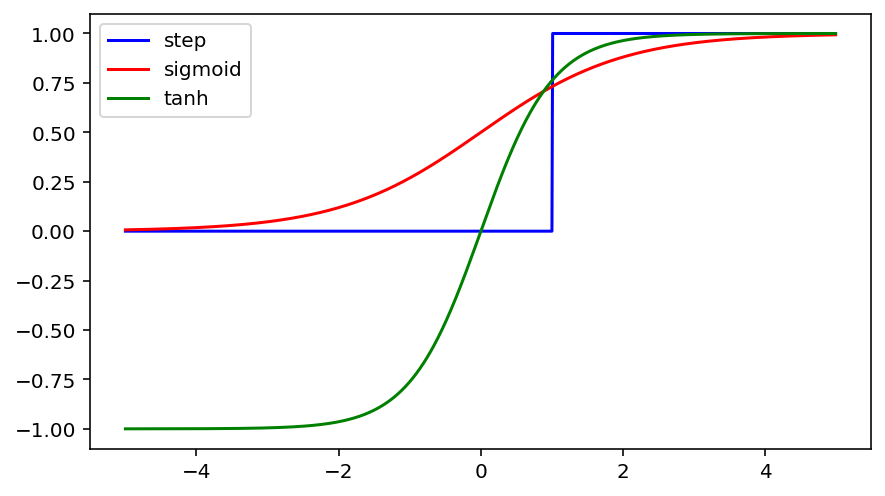

In [248]:
from ipykernel import kernelapp as app
import numpy as np
import matplotlib.pyplot as plt
import torch

x = np.arange(-5, 5, 0.01)

plt.figure(figsize = (7,4))
plt.plot(x, step_func(torch.as_tensor(x).numpy()), color = 'b', label ='step')
plt.plot(x, sigmoid_func(torch.tensor(x)), color = 'r', label = 'sigmoid')
plt.plot(x, tanh_func(torch.as_tensor(x)), color = 'g', label = 'tanh')
plt.legend()
plt.show()

To refresh your knowledge about activation functions from the lecture, have a look at [[15]](https://missinglink.ai/guides/neural-network-concepts/7-types-neural-network-activation-functions-right/). However, keep in mind that even an activation function requires optimization for itself. For this reason, a heavy research also have been in improving the activation function to allow for good generalization of your task. To read some adaptive approach for learning the right activation function for each neuron seperately, have a look at the [paper](https://arxiv.org/pdf/1412.6830.pdf) published at the ICLR 2015.


## Exercise:
A generalization of the __sigmoid__ function for the multinomial case is the __softmax__ function. This is of interest when the probablilites associated with a multinoulli distribution should be computed [[16]](https://www.deeplearningbook.org/contents/mlp.html). It is defined by 

$$\begin{align}
y(x) = \frac{e^{-x}}{\sum_i^n e^{-x_i}}.
\label{eq:softmax}\tag{5}
\end{align}$$

__Now it is your turn!__ <br>
For a given list $L$ of length $n$, write a function `softmax` that applies the above function.




In [8]:
import numpy as np

## to be done by the students
L = [1, 4, 2, 32, 1, 75, 84, 34, 43]

def softmax(L):
    exL = np.exp(L)
    sumExL = sum(exL)
    res = [] #empty list in which results are stored
    for i in exL:
        res.append(i*1/sumExL)
    return res 

print(L)
print(softmax(L))

[1, 4, 2, 32, 1, 75, 84, 34, 43]
[8.984717141867128e-37, 1.8046286789736938e-35, 2.4422993340581905e-36, 2.609956975388697e-23, 8.984717141867128e-37, 0.00012339457598623172, 0.9998766054240139, 1.9285118506942448e-22, 1.5626893381499193e-18]


## __Did you notice that for two classes the softmax function is the equivalent of the sigmoid activation function?__


## 2.3 Optimization <a class="anchor" id="optim"></a>
When training a neural network there are a bunch of hyperparameters to optimize:

1. number of layers and neurons
2. learning rate
3. batch size
4. momentum
5. number of epochs
6. dropout
7. activation function


To determine the hyperparamters of our neural network we usually try to minimize or maximize a specific __objective function__ $f(\cdot)$. <br>
By choosing a specific optimization criteria we are able to validate our results so that in the case of minimization of a function (in this case we often talk about a __loss function__, or __cost function__) we try to 

$$
\begin{equation*}
x^* = \text{arg min } f(x).
\label{eq:optim}\tag{6}
\end{equation*}
$$

To do so, a well known optimization technique is te __Gradient Descent__ algorithm. Based on the initial starting paramters and a specified step size, we are trying to find the global optimum. This is usually done by following the gradient of the function. One downside of this algorithm is that it is very much dependent on the chosen step size. When choosing the step size (in machine learning also often well-known as our learning rate) too high we are very much likely to miss our global optimum. When choosing the step size too small, the training procedure takes very long and, therefore, shows a slow convergence to the global solution. Furthermore, it is very likely to get trapped within a local minima/maxima. In case of deep learning this is often referred as __Batch Gradient Decent__ where the optimization takes place based on the entire training dataset [[17]](https://arxiv.org/pdf/1609.04747.pdf). Another optimization technique usually preferred is the __stochachastic gradient decent (SGD)__ which optimizes based on each training sample. Another optimization technique in deep learning which have become popular is the __Adam__ which allows to optimize based on adaptive learning rates by incoorperating the momentum.



## 2.4 Training and Testing <a class="anchor" id="TNT"></a>


One of the key goals when training a neural network is that it is able to generalize well on _new, unseen_ data. This takes as a prerequisite that the training dataset is "rich" enough both on containing enough training samples but also of being able to reflect the world. This task in machine learning can quite hard to accomplish! <br>

When training a neural network we prefer to split our dataset into a training and testing dataset, for which a split of 70:30 has become a "rule of thumb". When starting to tune our hyperparameters we try to optimize some kind of __training error__ which we have choosen previously. For this, we usually start by trying to maximize our accuracy (or minimizing our loss). 

So far this is just a simple optimization problem. One of our goals in machine learning though is to also being able to generalize well. For this we also look at the __test error__ which we get based on the testing dataset. As you can probably already guess it becomes quite important to choose a test dataset which does not contain any samples from the training dataset, as this would underestimate our test error. However, one important assumption made is that both training and testing dataset are generated based on the same underlying probability distribution. A usual assumption for this is that the samples are __independent, identically distributed__. This assumption is what actually makes us able to study the relationship between the training and test error in mathematical terms! <br>

Hence, to know weither a model is training well we look at 1.) if the training error or loss is decreasing and 2.) look at the difference of training and test error. __When starting our training procedure we generally first prefer to overfit than underfit our data!__ But what do we mean with underfitting and overfitting? <br>

We are talking about __underfitting__ when we our error rate within the different epochs is not decreasing as expected. On the other hand, __overfitting__ occurs when the gap between training and testing error is too large. This becomes more evident when having a loop at the following graphic retrieved from the slides publicly available by Goodfellow [[18]](https://www.deeplearningbook.org/slides/05_ml.pdf):

<img src='img\overfitting_underfitting.png' width="500">

Here you are trying to find the optimal capacity so that we neither reach the point that our model starts to underfit oder overfit based on the input data. In case of underfitting, we are not able achieve the optimal learning. When reducing the error rate of the training of the model further, some kind of overfitting might take place where the decision boundary becomes very close to the data points from the training dataset. Nonetheless, this has the effect that it is not able to generalize well on new data points. <br>

<div class="alert alert-block alert-info"><b> Reminder: <br>
    Test error: estimate the expected value of some predefined error metric based on a new input <br>
    Overfitting: often also refered as the "memorization" of the  results<br>
    Underfitting: not able to reach a sufficiently low error rate since the model is not able to learn properly <br>
    </b>
    


### Theoretical questions

1. What kind of phenomenon might occur when designing your model based on both training and test set? <br>
        
        One risk when evaluation the error rate of both training and test dataset is that when tuning our model, we might start to overfit both of them. We, therefore, adivce the introduction of a validation dataset. We first tune our weights and biases in the training datset and validate the model by using a validation datset. The testing set is only touched at the very end when the training was successful. 
        
2. We neither like our model to under- nor overfit. Why do you think overfitting is preferred when training, even though the generalization gap is becoming larger?
        
        Underfitting generally means that our model is not able to adapt well on the given training dataset. It is therefore of no surprise that our model will also not adapt well to the testing dataset. When overfitting occurs, we have the problem that our model started memorize the results. However, this has the advantage that we know that our model is appropriate for our application. There are different ways of coping with overfitting, for example by including cross-validation or by introducing some kind of regularization.

# 3. Training Neural Networks with Pytorch <a class="anchor" id="Pytorch"></a>
In our first lecture, we briefly discussed the different frameworks available in Python. Pytorch has the convenience of allowing some kind of "wrapper" to the `numpy` package, allowing for a quick conversion between both tensors (as used in pytorch) to numpy arrays [[19]](https://pytorch.org/tutorials/beginner/former_torchies/tensor_tutorial.html). Furthermore, it allows for executing accelerated computations using your own GPU by writing a simple one-liner. For more details on this see [[20]](https://pytorch.org/docs/stable/cuda.html) and [[21]](https://pytorch.org/docs/stable/notes/cuda.html). 

## 3.1 Installation of pytorch package <a class="anchor" id="installation"></a>
To install pytorch lets go onto the following [page](https://pytorch.org/).

To do the installation within the `jupyter notebook` use the below command. When doing installations within the notebook we advice you to use the command `!conda install --yes --prefix {sys.prefix}` instead of `!conda install`. The reason why we advice you to do so is that both python and the shell environment are disconnected. To read more on this look at [[22]](https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/).

In [90]:
import sys
!conda install --yes --prefix {sys.prefix} conda install pytorch torchvision cpuonly -c pytorch

## 3.2 Single layer neural network <a class="anchor" id="single_layer"></a>
As already mentioned, `pytorch` easily allows to convert tensors to `numpy` arrays. To see this effect of equation ([1](#sum_weighted_inputs)) better, lets try to apply to simulate some random normal distributed data and pass it to a single neuron. Based on our object `y`, we can afterwards have a look at the effect of using different activation functions:

In [258]:
import torch

### Generate artificial data
torch.manual_seed(123)

# output mostly given as a tuple such an this case
# other dtypes also possible by proving the argument 'dtype = torch.float'
# 5 input features drawn from random normal distribution
features = torch.randn((1,5)) 

#set weights for data; randn_like reuses properties / shape of the input object/tensor "features"
weights = torch.randn_like(features)

#true bias
bias = torch.randn((1,1))

y = torch.sum(features * weights) + bias
y1 = sigmoid_func(torch.sum(features * weights) + bias)
y2 = step_func(torch.sum(features * weights) + bias)
y3 = tanh_func(torch.sum(features * weights) + bias)

print(y)
print("sigmoid function:", y1)
print("step function:", y2)
print("tanh function:", y3)

tensor([[0.4011]])
sigmoid function: tensor([[0.5989]])
step function: tensor([[0]])
tanh function: tensor([[0.3809]])


C:\Users\Dominique.AW\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  from ipykernel import kernelapp as app


Do you remember our equation ([1](#sum_weighted_inputs)) from the top? Lets compute for a single layer network! <br>

For this we first have to load the package pytorch by `import torch`. To guarantee the reproducibility of our code we set a manual seed by using the function `torch.manual_seed()`.To see the magic behind a single layer neural net, we first generate some data from a normal distribution. Lets look at each line separately:

`features = torch.randn((1,5))` creates a tensor of shape (1,5) with one row and five columns whose values are drawn from a normal distribution with $\mu=0$ and $\sigma=1$ <br>
`weights = torch.randn_like(features)` creates another tensor with the samee shape / properties as the ones in `features`. <br>
`bias = torch.randn((1,1))` creates a tensor with a single value from a normal distribution <br>

The object `y` contains all the weighted inputs $x_1, x_2, \cdots, x_n$ according to equation ([1](#sum_weighted_inputs)). In the variables `y1`, `y2` and `y3` we apply the different activation functions which we have introduced in section [2.2](#activation_function).

You can look at tensors as an instance of a matrix. Just as with numpy array, tensors in pytorch allow you to do arithmetic operations such as multiplication, addition, subtraction etc. However, the benefits become noticable when your neural network becomes more rich in size (then often talking about deep neural networks) and data. In this case, GPU acceleration allows you to achieve the same performance in less computational time. 
__citation__

In [11]:
y_torch = sigmoid_func(torch.sum(features * weights) + bias)
y_numpy = sigmoid_func((features * weights).sum() + bias)

Within the object `y_torch` we execute an element-by-element multiplication of the objects `features` and `weights` by using the package __pytorch__ whereas in `y_torch` a summation of a tensor is done for __each array__ [[23]](https://github.com/pytorch/pytorch/issues/29137) [[24]](https://pytorch.org/docs/master/torch.html?highlight=torch%20max#torch.einsum) [[25]](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html).

# 4. Classification on MNIST Dataset <a class="anchor" id="mnist"></a>
For the start lets have a look at the __Fashion MNIST Dataset__ which is freely available within the _dataset_ module in torchvision [[26]](https://pytorch.org/docs/stable/torchvision/datasets.html).

In [1]:
#import sys
#!conda install --yes --prefix {sys.prefix} "pillow<7"

In [1]:
### Run this cell
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)


In [14]:
trainset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: C:\Users\Dominique.AW/.pytorch/F_MNIST_data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

When working with image data we always normalize our data beforehand. This is done by specifying the transformations beforehand with the object `transform` chained together with `Compose` [[27]](https://pytorch.org/docs/stable/torchvision/transforms.html). We will refer again to this when talking about data augmentation! <br>

Afterwards we load our training and test dataset. Pytorch (and also python APIs such as _keras_ ) already contains a range of freely available datasets. Other well-known datasets are for instance the MNIST handwriting dataset but also many other ones from various "coding challenges" [[28]](https://pytorch.org/docs/stable/torchvision/datasets.html#cifar). <br>

In `trainset` we specify what kind of dataset to load, whether we want to load the training or test set (pass _True_ for the argument train and _False_ for the testing set) and what kind of transform to execute beforehand.
To load the data in `trainloader`, we first specify the size of the batch which should be loaded within the `batch_size` and turn the `shuffle` to _True_. We do the same for the objects `testset` and `testloader`, however, we have to note that the shuffling process is only adviced during training.

 <div class="alert alert-block alert-info"><b>Reminder: <br>
    batch size: specifies the number of training example we feed on our model before we update our hyperparameters <br>
    shuffle: randomizing the of order of the images so our model will not start to memorize the order 
</b> 
    

To visualize specific data from the training dataset (or testing dataset) we are going to import some functions contained within `helper_func` made publically available by _Udacity_ :

In [ ]:
import helper_func

image, label = next(iter(trainloader))
helper_func.imshow(image[0,:], title = "Image from training dataset")

When using `DataLoader` keep in mind that it is a generator. To retrieve the item, one possibility is to use the function `next()` during each iteration specified by the function `iter()` [[29]](https://docs.python.org/3/library/functions.html#next). Another possibility would be to iterate over it by using a `for` loop.


## 4.1 Building the Neural Network <a class="anchor" id="building"></a>
For now we were able to load our training and test data successfully!!! <br>
Lets start defining our first model in our class __Classifier__ below.
For that purpose we first import the `nn` and `optim` module which enable us to define the structure of our neural net and allow us to optimize our hyperparameters during training.

In [8]:
from torch import nn, optim
import torch.nn.functional as F

In [9]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

Within our constructor `__init__` we first define the layers of our neural net should have. In the above example we define four __fully connected layers__ `fc1`, `fc2`, `fc3` and `fc4`. For `self.fc1 = nn.Linear(784, 256)` we specify the filter size of our kernel by assigning the 784 input features and 256 output features. These 256 output features are afterwards passed to the next layer. This process is quite typically to do some kind of __feature reduction__. For a better understanding: the 784 features derive from the number of pixels which in our case are (28x28 pixels in length and width). Another argument that can be passed is the `bias` which was not considered within our above example [[30]](https://pytorch.org/docs/stable/nn.html#linear-layers). <br>

In our method `forward` we define what kind of activation function that should be used within each layer. For instance, in `F.relu(self.fc1(x))` we directly pass the ReLu activation function on our weighted inputs. To do so, make sure in advance that your input tensor is flattend! <br>
The activation function to choose at the last layer very much depends on the kind of application we are intending to do. In our case, we are dealing with a __classification problem__ where we want to classify the different input images to a specified class. To do so, a (log) softmax activation function is usually applied to give you the probability a input is assigned to each output class: <br>
`x = F.log_softmax(self.fc4(x), dim=1)`

In pytorch you only have to define the forward pass. The backward pass is already implemented in pytorch using autograd.


<div class="alert alert-block alert-info"><b>Reminder: <br>
    Flattening: converting a 2D array (for instance an image) into a 1D vector <br>    
</b>


## 4.2 Training the Neural Network <a class="anchor" id="training"></a>
Based on the specified architecture we mentioned before, we can now start training our neural network based on the training dataset.

In [10]:
LEARNING_RATE = 0.0003

model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

print(model)

Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


For this we first create a `model` as an instance of our class `Classifier()`. Afterwards we define the criterion on which our optimisation should be based on. `NLLLoss()` computes the __negative log likelihood loss__. This is based on the assumption that you are trying to maximize the likelihood of choosing the optimal weights. When looking at a classification problem this is equivalent to the also well-known __cross entropy loss__ [[31]](https://discuss.pytorch.org/t/difference-between-cross-entropy-loss-or-log-likelihood-loss/38816/2). 

Above in section 2.2 we talked about the different optimizers to use. This is specified in the below example by choosing `Adam` as the optimization technique of our choice. However, there are many other optimizeres already available within __pytorch__ which can be found [here](https://pytorch.org/docs/stable/optim.html). For instance, an extension of the above mentionend gradient decent is the implementation of SGD (stochastic gradient decent) which picks a data point from the dataset at random during each iteration [[32]](https://developers.google.com/machine-learning/crash-course/reducing-loss/stochastic-gradient-descent). The optimization heavily depends on the __learning rate__ that is set beforehand. The learning rate describes the step to take during each iteration of the learning process and can take a value between 0 and 1. It is one of our other hyperparameters which has to finetuned. A low learning rate leads to a slow learning process but guarantees a good smooth convergence to your global optimum. To speed up the learning process one often increases the learning rate, however, this can lead that we are not able to converge. 

Pytorch already contains a variety of loss criteria and optimizers implemented. A thorough documentation can be found on [[33]](https://pytorch.org/docs/stable/nn.html).

<div div class="alert alert-block alert-info"><b>Reminder: <br>
learning rate: describes the step size to take during the learning process
</b>

In [11]:
#TODO: Train the neural network
EPOCHS = 5

for e in range(EPOCHS):
    running_loss = 0
    for images, labels in trainloader:
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.5929106589891254
Training loss: 0.4057030280166343
Training loss: 0.36281731897897557
Training loss: 0.3343141763639857
Training loss: 0.31457312089770334


For our training, we first decide on the epoch size which we set to `EPOCHS = 5` (please keep in mind that the value of the epoch size is usuallymuch higher!). As the first for loop already indicates, the number of __epochs__ define the number of times the training data is fed to the neural network. To validate the result of each training epoch, the training loss and accuracy is usually evaluated. For each training epoch you can recognize a decrease in the training loss. These values become even more important later on, when evaluating our results in comparison to our test data set. 

For each epoch we run our model saved in `log_ps`. Furthermore, we determine the loss for each iteration saved in `loss = criterion(log_ps, labels)`. In `loss.backward()` we determine the derivative with respect to the previous parameters when doing backpropagation. In `optimizer.step()` we take a step forward. 

In pytorch the gradient is accumulated during on subsequent backward passes. This becomes very helpful when training recurrent networks. However, for our application these should be set back to zero [[34]](https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch). `optimizer.zero_grad()` makes sure that when iterating through the epochs the gradient is set back to zero to avoid accumulation of the error.
        
<div class="alert alert-block alert-info"><b>Reminder: <br>
Epochs: epochs define the number of times the training data is shown to the network during training
</b>

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper_func

# Test out your network!
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
helper_func.view_classify(img, ps, "Fashion")

Duplicate key in file WindowsPath('C:/Users/Dominique.AW/Anaconda3/lib/site-packages/matplotlib/mpl-data/stylelib/style.mplstyle') line #24.
Duplicate key in file WindowsPath('C:/Users/Dominique.AW/Anaconda3/lib/site-packages/matplotlib/mpl-data/stylelib/style.mplstyle') line #75.
Duplicate key in file WindowsPath('C:/Users/Dominique.AW/Anaconda3/lib/site-packages/matplotlib/mpl-data/stylelib/style.mplstyle') line #77.
Duplicate key in file WindowsPath('C:/Users/Dominique.AW/Anaconda3/lib/site-packages/matplotlib/mpl-data/stylelib/style.mplstyle') line #92.

Bad key "loc" on line 9 in
C:\Users\Dominique.AW\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\style.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key "ytick.major.top" on line 70 in
C:\Users\Dominique.AW\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\style.mplstyle.


NameError: name 'testloader' is not defined

## 4.3 Training and testing <a class="anchor" id="test_val"></a>
For now lets assume that we are only considering training and testing dataset. To see how well our model is doing both on training and testing dataset we first load just as within the previous example.

In [281]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [282]:
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

As you see we didn't make any changes to model itself!

In [283]:
model = Classifier()

images, labels = next(iter(testloader))
# Get the class probabilities
ps = torch.exp(model(images))
# Make sure the shape is appropriate, we should get 10 class probabilities for 64 examples
print(ps.shape)

torch.Size([64, 10])


We again train our model by executing our class `Classifier()`. <br>
When using `ps.shape` we get the dimension of the batch size and the ten classes

In [262]:
top_p, top_class = ps.topk(1, dim=1)
# Look at the most likely classes for the first 10 examples
print(top_class[:10,:])

tensor([[4],
        [4],
        [4],
        [4],
        [4],
        [4],
        [4],
        [4],
        [4],
        [4]])


In [32]:
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy: {accuracy.item()*100}%')

Accuracy: 93.75%


When we are trying to evaluate our results we have seen in the lecture that there are multiple ways on how you evaluate your results. One way is the `Top-10-Criteria` seen above. However, one standard way of doing is by looking at the __accuracy__ or the __loss__ within each epoch. In the variable `accuracy` we store the percentage of how accurate we are able to predict or infer about the class based on an unseen input data. The accuracy can be defined as: 

$$
\begin{equation}
accuracy = \frac{TP+TN}{TP + TN + FP + FN}
\end{equation}
$$



In [128]:
#define model and hyperparameters
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.602..  Test Loss: 0.517..  Test Accuracy: 0.827
Epoch: 2/30..  Training Loss: 0.478..  Test Loss: 0.483..  Test Accuracy: 0.829
Epoch: 3/30..  Training Loss: 0.447..  Test Loss: 0.504..  Test Accuracy: 0.832
Epoch: 4/30..  Training Loss: 0.437..  Test Loss: 0.490..  Test Accuracy: 0.834
Epoch: 5/30..  Training Loss: 0.414..  Test Loss: 0.493..  Test Accuracy: 0.833
Epoch: 6/30..  Training Loss: 0.405..  Test Loss: 0.474..  Test Accuracy: 0.846
Epoch: 7/30..  Training Loss: 0.398..  Test Loss: 0.438..  Test Accuracy: 0.855
Epoch: 8/30..  Training Loss: 0.401..  Test Loss: 0.500..  Test Accuracy: 0.828
Epoch: 9/30..  Training Loss: 0.397..  Test Loss: 0.513..  Test Accuracy: 0.826
Epoch: 10/30..  Training Loss: 0.394..  Test Loss: 0.469..  Test Accuracy: 0.845
Epoch: 11/30..  Training Loss: 0.382..  Test Loss: 0.447..  Test Accuracy: 0.850
Epoch: 12/30..  Training Loss: 0.387..  Test Loss: 0.448..  Test Accuracy: 0.846
Epoch: 13/30..  Training Loss: 0.373.

In [146]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

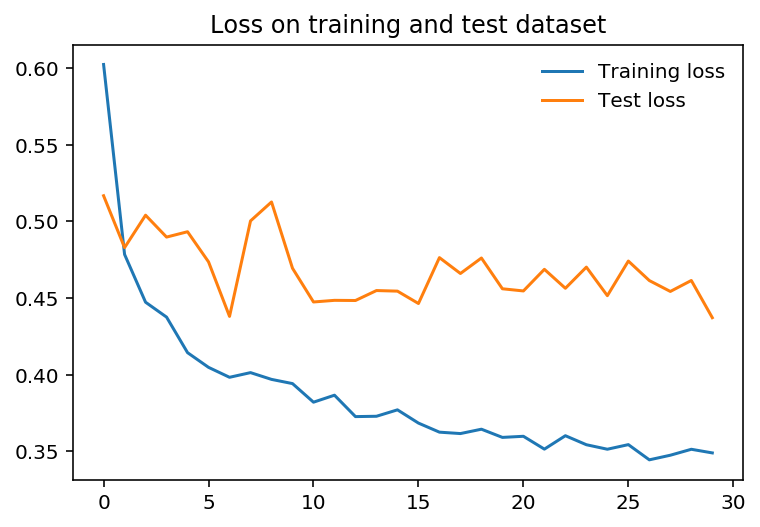

In [141]:
plt.plot(train_losses, label = "Training loss")
plt.plot(test_losses,label = "Test loss")
plt.title("Loss on training and test dataset")
plt.legend(frameon = False)
plt.show()

When looking at the loss based on the training data, we can see a exponential decay already after 30 epochs! __This is good since we already know that our model is learning properly!!!__ <br>
However, when comparing this to the loss of our testing loss there is no significant improvement visible for the different epochs. We say, that our model is not able to generalize well! One method to overcome this problem is to use __regularization__.

## 4.4 Overfitting <a class="anchor" id="overfitting"></a>

When the capacity is too high, we face the counterside of overfitting on the testing dataset. To get a better understanding of this problem, lets have a look at a new model where we introduced dropout as a regularization technique:

In [292]:
import torch
from torchvision import datasets, transforms

In [287]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [288]:
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))

        # output so no dropout here
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

One problem when training a neural network is that some neurons tend to be more active than others. This leads to part of the network to end up with very large weights, while other parts show up only very small weights. We can therefore include something which is called __dropout__. For that we specify with what kind of probability with we are going to drop  specific neurons [[35]](http://jmlr.org/papers/volume15/srivastava14a.old/srivastava14a.pdf). This can be seen as some kind of randomness or noise given to the neural network and is normally used to reduce overfitting. <br>
__Be careful though!__ However, when outputs of a layer are randomly subsampled, it leads to the "thinning of the neural network" [[36]](https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/). In other words, this means that the effective capacity shown in the figure is reduced. This the advantage, that usually a larger model is required (often coming with the cost of an increasing training dataset) at a higher training time [[37]](https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5) [[38]](https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/).


<div class="alert alert-block alert-info"><b> Reminder: <br>
    Dropout: is a kind of regularization technique for which the neuron are dismissed by a given probability  
</b>

In [289]:
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 100
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/100..  Training Loss: 0.520..  Test Loss: 0.451..  Test Accuracy: 0.837
Epoch: 2/100..  Training Loss: 0.394..  Test Loss: 0.403..  Test Accuracy: 0.855
Epoch: 3/100..  Training Loss: 0.358..  Test Loss: 0.401..  Test Accuracy: 0.858
Epoch: 4/100..  Training Loss: 0.335..  Test Loss: 0.389..  Test Accuracy: 0.866
Epoch: 5/100..  Training Loss: 0.316..  Test Loss: 0.382..  Test Accuracy: 0.865
Epoch: 6/100..  Training Loss: 0.307..  Test Loss: 0.390..  Test Accuracy: 0.868
Epoch: 7/100..  Training Loss: 0.292..  Test Loss: 0.361..  Test Accuracy: 0.875
Epoch: 8/100..  Training Loss: 0.285..  Test Loss: 0.403..  Test Accuracy: 0.859
Epoch: 9/100..  Training Loss: 0.275..  Test Loss: 0.401..  Test Accuracy: 0.871
Epoch: 10/100..  Training Loss: 0.268..  Test Loss: 0.387..  Test Accuracy: 0.873
Epoch: 11/100..  Training Loss: 0.259..  Test Loss: 0.425..  Test Accuracy: 0.865
Epoch: 12/100..  Training Loss: 0.254..  Test Loss: 0.350..  Test Accuracy: 0.883
Epoch: 13/100..  Training

In [290]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

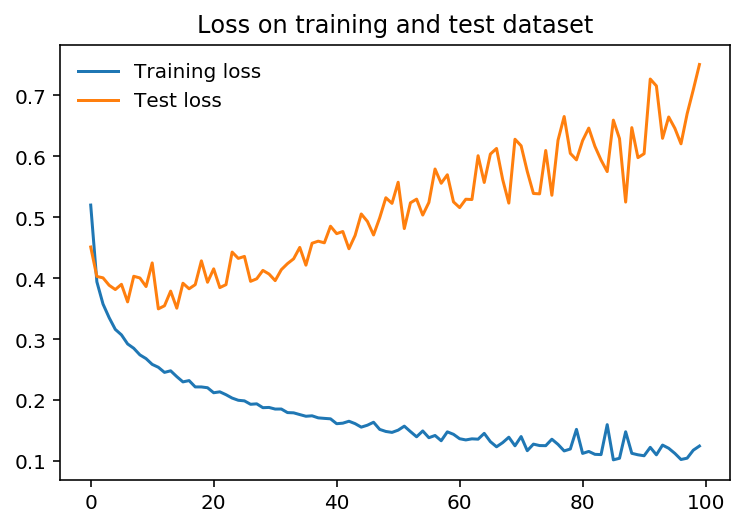

In [291]:
plt.plot(train_losses, label = "Training loss")
plt.plot(test_losses,label = "Test loss")
plt.title("Loss on training and test dataset")
plt.legend(frameon = False)
plt.show()

The above plot is a typical example of an overfitting where the training loss starts decreasing while the test loss starts to rise with increasing epoch size.<br>
As you see our _training loss_ keeps decreases exponentially till about 75 epochs! After 75 epochs we can see some fluctuations regarding the _training loss_. One method to cope with this is to take some changes regarding the hyperparameters. However, there are also cases where it is better to stop the training after a certain number of epochs when there seems to be some kind or "repetition in the training". <br>
Looking at the testing loss you can see that it the eror is increasing again. 

A typical way of approaching this problem would be to save
- the model and the values for the hyperparameters
- the trained weights
- the accuracy and loss

and always save a new copy as soon as the model has improved.

## 4.5 Saving and Loading the Neural Network <a class="anchor" id="save_n_load"></a>

When storing and loading your neural network, there are different approaches to do so. You can either only store the hyperparameters or load the trained model itself. To demonstrate this, we will again use the identical model and hyperparameters from section 4.3 __BUT instead we will save time by only using 10 epochs!!!__

In [22]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [23]:
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [24]:
#define model and hyperparameters
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 10
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/10..  Training Loss: 0.519..  Test Loss: 0.475..  Test Accuracy: 0.826
Epoch: 2/10..  Training Loss: 0.393..  Test Loss: 0.411..  Test Accuracy: 0.854
Epoch: 3/10..  Training Loss: 0.356..  Test Loss: 0.404..  Test Accuracy: 0.859
Epoch: 4/10..  Training Loss: 0.333..  Test Loss: 0.398..  Test Accuracy: 0.864
Epoch: 5/10..  Training Loss: 0.317..  Test Loss: 0.375..  Test Accuracy: 0.870
Epoch: 6/10..  Training Loss: 0.304..  Test Loss: 0.366..  Test Accuracy: 0.875
Epoch: 7/10..  Training Loss: 0.295..  Test Loss: 0.374..  Test Accuracy: 0.873
Epoch: 8/10..  Training Loss: 0.285..  Test Loss: 0.363..  Test Accuracy: 0.876
Epoch: 9/10..  Training Loss: 0.272..  Test Loss: 0.385..  Test Accuracy: 0.871
Epoch: 10/10..  Training Loss: 0.265..  Test Loss: 0.366..  Test Accuracy: 0.874


As you might be aware, it is inpractical to always retrain a model every time you want to use it. Instead we can save our pretrained model and load it later for inference. 

In [29]:
#print("Model's state_dict:")
#for param_tensor in model.state_dict():
#    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

print(model.state_dict())    
#print(model.state_dict().keys())

#print("---")
#print("Optimizer's state_dict:")
#for var_name in optimizer.state_dict():
#    print(var_name, "\t", optimizer.state_dict()[var_name])

OrderedDict([('fc1.weight', tensor([[0.1905, 0.1541, 0.1962,  ..., 0.3834, 0.1266, 0.1620],
        [0.0634, 0.0618, 0.0591,  ..., 0.0553, 0.0837, 0.1051],
        [0.1292, 0.0825, 0.0924,  ..., 0.0803, 0.1095, 0.0962],
        ...,
        [0.1428, 0.0750, 0.0855,  ..., 0.0493, 0.0903, 0.0974],
        [0.1295, 0.0941, 0.1165,  ..., 0.1905, 0.0878, 0.1073],
        [0.1929, 0.1446, 0.1704,  ..., 0.0850, 0.1081, 0.1253]])), ('fc1.bias', tensor([-1.7421e-01, -1.2423e-01, -9.4686e-02, -1.5087e-01, -4.1590e-02,
        -1.3791e-01, -1.5920e-01, -5.5772e-02, -2.5267e-01, -1.3428e-01,
        -1.2447e-01, -7.6033e-02, -4.4266e-02, -2.1016e-01, -1.7147e-01,
        -7.1504e-02, -6.9350e-02, -5.1584e-02, -1.1005e-01, -7.8703e-02,
        -1.5628e-01, -6.8262e-03, -1.1917e-01, -2.2838e-01, -1.4813e-01,
         2.3541e-02, -1.4222e-01, -1.6171e-01, -5.7755e-02, -1.4075e-01,
        -1.1615e-01, -1.1284e-01, -1.2234e-01, -1.6882e-01, -7.2570e-02,
        -6.4062e-02, -1.7252e-01, -1.1277e-01, -

Lets go through this again line by line: <br>

We first want to give out the _state dictionary_ of the model. This is a dictionary which includes all the hyperparameters specified beforehand assigned to the according key (to only extract the keys use `model.state_dict().key()`).

#### Saving model for inference
The preferred version for inference is to solely store the hyperparameters the model was trained on. 

In [30]:
PATH = r'C:\Users\Dominique.AW\Desktop\Doktorarbeit\htw\PythonTutorial\4_CNN_Pytorch'

save_model = torch.save(model.state_dict(), 'checkpoint.pth')

By using `model.state_dict(PATH, 'checkpoint.pth')` we are able to retrieve a dictionary including the keys and the according values (the values of the hyperparameters we trained on) and store it by using `torch.save()`.

Here, we usually like store these in the file extension `.pt` or `.pth`.

In [22]:
state_dict = torch.load('checkpoint.pth')
print(state_dict.keys())

odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias', 'fc4.weight', 'fc4.bias'])


In [25]:
model = Classifier()
model.load_state_dict(state_dict)

<All keys matched successfully>

#### Loading data with your GPU

In [131]:
if torch.cuda.is_available():
    device = cuda.device("GPU")
    ...
    ...
    pass

## 5. Exercises:
### 5.1 Tuning of the hyperparameter 
Based on the above dataset `MNIST Fashion`, try to find the appropriate hyperparameters so that you achieve a high accuracy (or convergence to a minimal loss) for both training and testing datset.

In [31]:
import torch
from torchvision import transforms, datasets

trans = transforms.Compose([
    transforms.CenterCrop(25),
    transforms.ToTensor(),
    transforms.RandomAffine(180),
#    torchvision.transforms.Normalize([0.5,], [0.5,]),
])

trainset = datasets.FashionMNIST(r'C:\Users\Dominique.AW\Desktop\Doktorarbeit\htw\PythonTutorial\4_CNN_Pytorch', download = True, train = True, transform = trans)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

testset = datasets.FashionMNIST(r'C:\Users\Dominique.AW\Desktop\Doktorarbeit\htw\PythonTutorial\4_CNN_Pytorch', download = True, train = False, transform = trans)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = True)

In [125]:
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(786,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64)
        self.fc4 = nn.Linear(64,10)
        
    def forward(self):
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.dropout(F.relu(self.fc3(x)))
        x = F.LogSoftmax(self.fc4(x), dim = 1) #LogSoftmax()
        return x

In [129]:
#define model and hyperparameters
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 10
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/10..  Training Loss: 0.516..  Test Loss: 0.465..  Test Accuracy: 0.832
Epoch: 2/10..  Training Loss: 0.391..  Test Loss: 0.416..  Test Accuracy: 0.848
Epoch: 3/10..  Training Loss: 0.355..  Test Loss: 0.399..  Test Accuracy: 0.853
Epoch: 4/10..  Training Loss: 0.334..  Test Loss: 0.398..  Test Accuracy: 0.866
Epoch: 5/10..  Training Loss: 0.316..  Test Loss: 0.383..  Test Accuracy: 0.864
Epoch: 6/10..  Training Loss: 0.302..  Test Loss: 0.380..  Test Accuracy: 0.868
Epoch: 7/10..  Training Loss: 0.290..  Test Loss: 0.395..  Test Accuracy: 0.866
Epoch: 8/10..  Training Loss: 0.283..  Test Loss: 0.389..  Test Accuracy: 0.871
Epoch: 9/10..  Training Loss: 0.278..  Test Loss: 0.366..  Test Accuracy: 0.878
Epoch: 10/10..  Training Loss: 0.265..  Test Loss: 0.374..  Test Accuracy: 0.879


In [127]:
model

Model(
  (fc1): Linear(in_features=786, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

### 5.2 Data Augmentation
<a class="anchor" id="data_augmentation"></a>

To allow a neural network to generalize well, it heavily depends not only on the number of training and testing samples but also on the "population" or "diversity" of the data. You can see data augmentation as some kind of way how to fool your neural network by artificially generating new unseen data. The dimension of this becomes more clear when you having a look at [[39]](https://arxiv.org/pdf/1710.08864.pdf) where the change of a single pixel within one image can cause it to be assigned to a totally different class - or _vice versa_ in their case - can be used to improve the results by combining adversarial techniques. This use of __Adversial Neural Networks__ can be come a rising field within the last few years especially after the first introduction of Generative Adversial Networks (GANs) by Ian Goodfellow. To have a grasp of its power have a look at the following [video](https://www.youtube.com/watch?v=dCKbRCUyop8) or his publication [[40]](https://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf).

For this task try to augment your data by including the following transform for the training and testing dataset (assigned with the variable name _train_transform_ and _test_transform_:

test_transform:
- Central crop or a __rectangle__ with 15 pixels height and 10 pixels in width
- Horizontal flip with a probability of $p=0.5$
- Normalize the data according to the previous examples

train_transform:
- Random crop with a _constant_ padding of 2 
- Horizontal flip with a probability of $p=0.3$
- Normalize the data according to the previous examples

In [3]:
import torch
from torchvision import datasets, transforms

In [4]:
PATH = r'C:\Users\Dominique.AW\Desktop\Doktorarbeit\htw\PythonTutorial\4_CNN_Pytorch\FashionMNISTAug'


test_transform = transforms.Compose([
    transforms.CenterCrop([15, 10]),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.Normalize([0.5,], [0.5,]),
])

train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomCrop(10, padding = 2, padding_mode = 'constant'),
    transforms.RandomHorizontalFlip(p=0.3),
    transforms.Normalize([0.5,], [0.5,]),
])


#traindata = datasets.FashionMNIST(PATH, download = True, train = True,  transform = train_transform)
#trainloader = torch.utils.data.DataLoader(traindata, batch_size = 64, shuffle = True)

#testdata = datasets.FashionMNIST(PATH, download = True, train = False, transform = test_transform)
#testloader =  torch.utils.data.DataLoader(testdata, batch_size = 64, shuffle = True)

In [6]:
#train_data = datasets.ImageFolder(PATH + '/training', transform=train_transform)
#test_data = datasets.ImageFolder(PATH + '/test', transform=test_transform)

#trainloader = torch.utils.data.DataLoader(PATH, batch_size=32)
#testloader = torch.utils.data.DataLoader(PATH, batch_size=32)

## References and citations

[[1]](https://www.tensorflow.org/) https://www.tensorflow.org/ <br>
[[2]](https://scikit-image.org/) https://scikit-image.org/ <br>
[[3]](https://keras.io/) https://keras.io/ <br>
[[4]](https://pytorch.org/) https://pytorch.org/ <br>
[[5]](https://pytorch.org/tutorials/beginner/examples_autograd/tf_two_layer_net.html) https://pytorch.org/tutorials/beginner/examples_autograd/tf_two_layer_net.html <br>
[[6]](https://towardsdatascience.com/pytorch-for-deep-learning-a-quick-guide-for-starters-5b60d2dbb564) https://towardsdatascience.com/pytorch-for-deep-learning-a-quick-guide-for-starters-5b60d2dbb564 <br>
[[7]](http://deeplearning.net/software/theano/) http://deeplearning.net/software/theano/ <br>
[[8]](https://machinelearningmastery.com/introduction-python-deep-learning-library-theano/) https://machinelearningmastery.com/introduction-python-deep-learning-library-theano/ <br>
[[9]](https://caffe.berkeleyvision.org/) https://caffe.berkeleyvision.org/ <br>
[[10]](https://towardsdatascience.com/deep-learning-framework-power-scores-2018-23607ddf297a?gi=fb13689f2184) https://towardsdatascience.com/deep-learning-framework-power-scores-2018-23607ddf297a?gi=fb13689f2184 <br> 
[[11]](https://heartbeat.fritz.ai/10-reasons-why-pytorch-is-the-deep-learning-framework-of-future-6788bd6b5cc2) https://heartbeat.fritz.ai/10-reasons-why-pytorch-is-the-deep-learning-framework-of-future-6788bd6b5cc2 <br>
[[12]](https://blog.paperspace.com/why-use-pytorch-deep-learning-framework/) https://blog.paperspace.com/why-use-pytorch-deep-learning-framework/ <br>

#### Section 2:
[[13]](https://towardsdatascience.com/weight-initialization-techniques-in-neural-networks-26c649eb3b78) https://towardsdatascience.com/weight-initialization-techniques-in-neural-networks-26c649eb3b78 <br>
[[14]](https://missinglink.ai/guides/neural-network-concepts/7-types-neural-network-activation-functions-right/) https://missinglink.ai/guides/neural-network-concepts/7-types-neural-network-activation-functions-right/ <br>
[[15]](https://missinglink.ai/guides/neural-network-concepts/7-types-neural-network-activation-functions-right/) https://missinglink.ai/guides/neural-network-concepts/7-types-neural-network-activation-functions-right/ <br>
[[16]](https://www.deeplearningbook.org/contents/mlp.html) https://www.deeplearningbook.org/contents/mlp.html <br>
[[17]](https://www.deeplearningbook.org/contents/mlp.html) https://www.deeplearningbook.org/contents/mlp.html <br>
[[18]](https://www.deeplearningbook.org/slides/05_ml.pdf) https://www.deeplearningbook.org/slides/05_ml.pdf <br>



#### Section 3:
[[19]](https://pytorch.org/tutorials/beginner/former_torchies/tensor_tutorial.html) https://pytorch.org/tutorials/beginner/former_torchies/tensor_tutorial.html <br>
[[20]](https://pytorch.org/docs/stable/cuda.html) https://pytorch.org/docs/stable/cuda.html <br>
[[21]](https://pytorch.org/docs/stable/notes/cuda.html) https://pytorch.org/docs/stable/notes/cuda.html <br>
[[22]](https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/) https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/ <br>



#### Section 4:
[[26]](https://pytorch.org/docs/stable/torchvision/datasets.html) https://pytorch.org/docs/stable/torchvision/datasets.html <br>
[[27]](https://pytorch.org/docs/stable/torchvision/transforms.html) https://pytorch.org/docs/stable/torchvision/transforms.html <br>
[[28]](https://pytorch.org/docs/stable/torchvision/datasets.html#cifar) https://pytorch.org/docs/stable/torchvision/datasets.html#cifar <br>
[[29]](https://docs.python.org/3/library/functions.html#next) https://docs.python.org/3/library/functions.html#next <br>
[[30]](https://pytorch.org/docs/stable/nn.html#linear-layers) https://pytorch.org/docs/stable/nn.html#linear-layers <br>
[[31]](https://discuss.pytorch.org/t/difference-between-cross-entropy-loss-or-log-likelihood-loss/38816/2) https://discuss.pytorch.org/t/difference-between-cross-entropy-loss-or-log-likelihood-loss/38816/2 <br> 
[[32]](https://developers.google.com/machine-learning/crash-course/reducing-loss/stochastic-gradient-descent) https://developers.google.com/machine-learning/crash-course/reducing-loss/stochastic-gradient-descent <br>
[[33]](https://pytorch.org/docs/stable/nn.html) https://pytorch.org/docs/stable/nn.html <br>
[[34]](https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch) https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch <br>
[[35]](http://jmlr.org/papers/volume15/srivastava14a.old/srivastava14a.pdf) http://jmlr.org/papers/volume15/srivastava14a.old/srivastava14a.pdf <br>
[[36]](https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/) https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/ <br>
[[37]](https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5) https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5 <br>
[[38]](https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/) https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/ <br>

#### Section 5
[[39]](https://arxiv.org/pdf/1710.08864.pdf) https://arxiv.org/pdf/1710.08864.pdf <br>
[[40]](https://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf) https://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf


http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf